In [1]:
import models
from models import model, create_cd_cluster, cd_diagram
from dataset_management import get_dataset, convert_to_autorank
from autorank import autorank, create_report, plot_stats
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

algorithm="algorithm";benchmark="bench_prior";seed="seed";budget="used_fidelity";loss="value"

In [2]:
dataset=get_dataset(dataset_name="fig7_24_at25_bad_intsteps")
dataset=dataset.loc[(dataset["prior"]=="bad")&(dataset[budget]>=0)]
# print(dataset)

P-values adjusted by tukey method for family of 10 estimates
(2, 4)
(0, 1)


<Axes: >

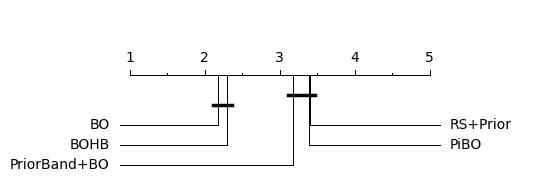

In [6]:
post_hocs=model(formula=f"{loss}~ + {algorithm} +(1|{benchmark})",data=dataset).post_hoc(marginal_vars=algorithm)
cd_diagram(post_hocs,reverse=False,ax=None,width=5)

<Axes: >

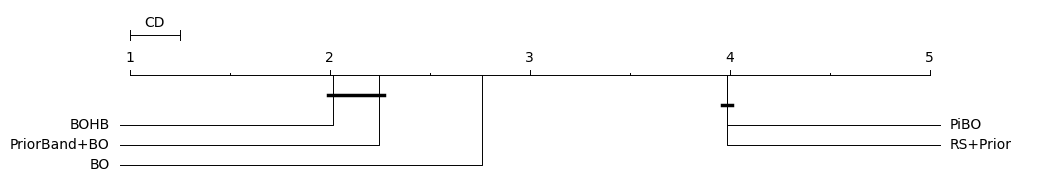

In [4]:
autorank_data=convert_to_autorank(dataset.loc[dataset[budget]==4])
autorank_res=autorank(autorank_data)
# print(autorank_res)
cd_diagram(autorank_res,reverse=False,ax=None,width=10)

In [5]:
# fig_top,axes_top= plt.subplots(
#         1,len(axes[0]),figsize=(max(fig.get_figwidth(),6*len(axes[0])),fig.get_figheight()/len(axes[0])))
# autorank_results={}
# for ax_n,ax in enumerate(axes_top):
#     autorank_data=convert_to_autorank(data.loc[data["used_fidelity"]<=time_slices[ax_n+1]])
#     autorank_results[f"1_{time_slices[ax_n+1]}"]=autorank(autorank_data)
#     ax=plot_stats(autorank_results[f"1_{time_slices[ax_n+1]}"],ax=ax,allow_insignificant=True)
#     ax.set_title(f"1_{time_slices[ax_n+1]}", pad=0, y=-0.18)
#     autorank_data=convert_to_autorank(data.loc[(data["used_fidelity"]>=time_slices[ax_n])&(data["used_fidelity"]<=time_slices[ax_n+1])])
#     autorank_results[f"{time_slices[ax_n]}_{time_slices[ax_n+1]}"]=autorank(autorank_data)
#     axes_bot[ax_n]=plot_stats(autorank_results[f"{time_slices[ax_n]}_{time_slices[ax_n+1]}"],ax=axes_bot[ax_n],allow_insignificant=True)
#     axes_bot[ax_n].set_title(f"{time_slices[ax_n]}_{time_slices[ax_n+1]}", pad=0, y=-0.18)